## Deconvolution as the solution of a linear Inverse Problem

The seismogram $d$ can be represented as follows 
$$ d = {W}r + n$$

where $d$ is the seismic trace, $W$ is the wavelet matrix and $r$ is the reflectivity.
In signal processing, you probably have seen that convolution can be expressed as Matrix-times-vector multiplication

$$W r  \equiv conv(w,r)\,.$$

Given the wavelet and the seismic trace, the goal is to estimate the reflectivy. We first
use the damped least-squares (DLS) method and then a sparse inversion method ($l_2-l_1$). 

### Part 1: Damped LS (The $l_2-l_2$ problem)

We minimize $$J = \| W r - d\|_2^2 + \mu \|r\|_2^2$$ to compute the regularized or damped 
least-squares solution which is given by

$$ {\hat r} = ( W^T W +  \mu I)^{-1} W^T d\,.$$

The predicted seismogram is ${\hat d} = W{\hat r}$

### Part 2: Sparse solution via IRLS ($l_2-l_1$ problem)

We minimize $$J = \| W r - d\|_2^2 + \mu \|r\|_1$$ which leads to non-linear form solution
$$ {r} = ( W^T W +  \mu Q)^{-1} W^T d$$

with the matrix of model parameters weights given by  $$Q = diag [ \frac{1}{|r|+\epsilon} ]$$
Clearly, is non-linear because the diagonal matrix $Q$ depends on the solution $r$. The latter
leads to the IRLS method (Iterative reweighted least-squares) where we solve the problem
via the following iteration
$$ {r}^{\nu} = ( W^T W +  \mu Q^{\nu-1})^{-1} W^T d$$

$$Q^{\nu-1} = diag [ \frac{1}{|r^{\nu-1}|+\epsilon}]$$ where $\nu$ indicates iteration.


In [1]:
function Convmtx(w,nr)
    # Computes the convolution matrix of the wavelet w
    # such that C r = conv(w,r) where r is a signal of lenght nr
	w  = vec(w)
	nw = length(w)
	nd = nw + nr - 1
	 C = zeros(nd, nr)
	for i=1:nr
		C[i:i+nw-1, i] = w
	end
	return C
end


Convmtx (generic function with 1 method)

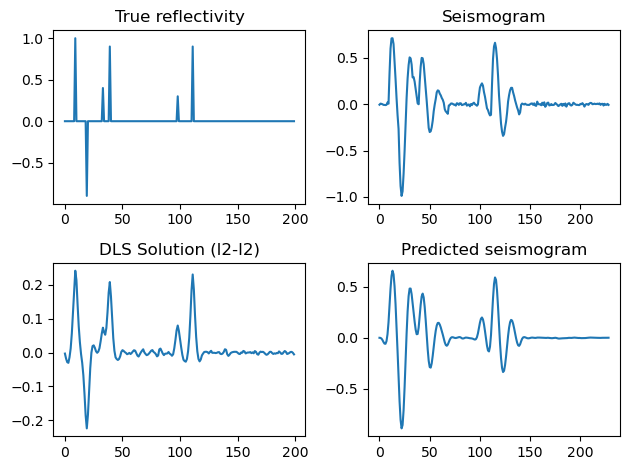

In [2]:
using PyPlot, LinearAlgebra

# First we make a synthetic reflectivity r
nr = 200
r = zeros(nr)
r[10] = 1.0
r[20] = -0.9
r[34] = 0.4;
r[40] = 0.9;
r[99] = 0.3;
r[112] = 0.9

# Now, we design a wavelet 
t = collect(0:1:29)*0.004
w = sin.(2*pi*15*t).*exp.(-20*t)

# Convolution matrix 
W = Convmtx(w,nr);

# Seismic trace
d = W*r

# Add noise to seismic trace 
d = d .+ 0.01*randn(size(d))

# Damped LS solution

mu = 1.

r_sol = (W'*W + mu*I)\(W'*d)

subplot(221); plot(r);       title("True reflectivity")
subplot(222); plot(d);       title("Seismogram")
subplot(223); plot(r_sol);   title("DLS Solution (l2-l2)") 
subplot(224); plot(W*r_sol); title("Predicted seismogram")

tight_layout()

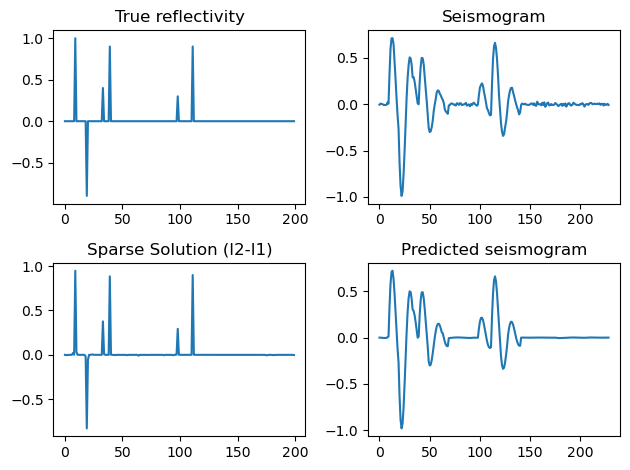

In [7]:
# Sparse solution via IRLS : Iterative Reweighted Least-squares (IRLS)

Q = I(nr)
mu = 0.01
x = zeros(nr)
for k = 1:20 
    x = (W'*W + mu*Q)\(W'*d);
    q = 1.0./(abs.(x).+0.0001)
    Q = diagm(0=>q)
end
r_sol = x

subplot(221); plot(r);       title("True reflectivity")
subplot(222); plot(d);       title("Seismogram")
subplot(223); plot(r_sol);   title("Sparse Solution (l2-l1)") 
subplot(224); plot(W*r_sol); title("Predicted seismogram")
tight_layout()
